<a href="https://colab.research.google.com/github/addaia/TechnicalProject/blob/main/plots_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**3.2 DATASET**



In [ ]:
#!pip install scienceplots datasets

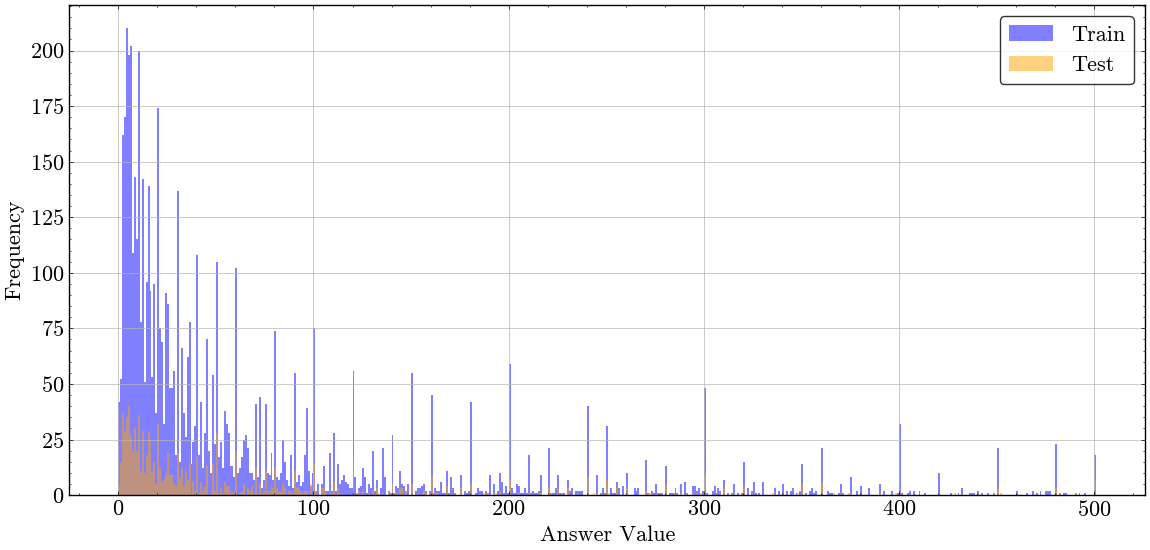

          Range  Train  Test
0      0 to 500   6438  1152
1  501 to 10000    834   129
2    over 10000    201    38


In [8]:
import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')

# parameters for the science style -- too many
plt.style.use(['science','no-latex'])
plt.rcParams.update({
    "font.size": 20,
    "axes.labelsize": 16,
    "legend.fontsize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "axes.linewidth": 1,
    "axes.edgecolor": "black",
    "legend.fancybox": True,
    "legend.frameon": True,
    "legend.edgecolor": "black",
    "axes.facecolor": "white",
    "axes.grid": True,
    "grid.color": "#b7b7b7",
    "grid.linestyle": "-",
    "grid.linewidth": 0.5,
})

# gsm8k dataset
ds = load_dataset("openai/gsm8k", "main")

# extract solutions
def extract_numbers(data):
    numbers = []
    for item in data:
        string = item['answer']
        try:
            # extract last number (after ####)
            num = int(re.findall(r'\d+', string)[-1])
            numbers.append(num)
        except IndexError:
            # Skip if no number is found
            continue
    return numbers

#perform
train_numbers = extract_numbers(ds['train'])
test_numbers = extract_numbers(ds['test'])

# plot for first 500 values
bins = np.arange(0, 502, 1)
train_numbers_in_range = [num for num in train_numbers if 0 <= num <= 500]
test_numbers_in_range = [num for num in test_numbers if 0 <= num <= 500]

plt.figure(figsize=(12, 6))
plt.hist(train_numbers_in_range, bins=bins, alpha=0.5, label='Train', color='blue')
plt.hist(test_numbers_in_range, bins=bins, alpha=0.5, label='Test', color='orange')
plt.xlabel('Answer Value')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# get bin values
def aggregate_counts(numbers):
    # bins:
    # 0 to 500, 501 to 10000, and over 10000
    bin1 = sum(1 for num in numbers if 0 <= num <= 500)
    bin2 = sum(1 for num in numbers if 501 <= num <= 10000)
    bin3 = sum(1 for num in numbers if num >= 10001)
    return bin1, bin2, bin3

train_counts = aggregate_counts(train_numbers)
test_counts = aggregate_counts(test_numbers)

# table
df = pd.DataFrame({
    'Range': ['0 to 500', '501 to 10000', 'over 10000'],
    'Train': train_counts,
    'Test': test_counts
})

print(df)
